In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [10]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Encoding categorical variables**

In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df=pd.get_dummies(df,drop_first=True)

In [13]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
df['Gender_Male'].value_counts()
#Male=1
#female=0

1    5457
0    4543
Name: Gender_Male, dtype: int64

# **Imbalanced data**

<Axes: xlabel='Exited', ylabel='count'>

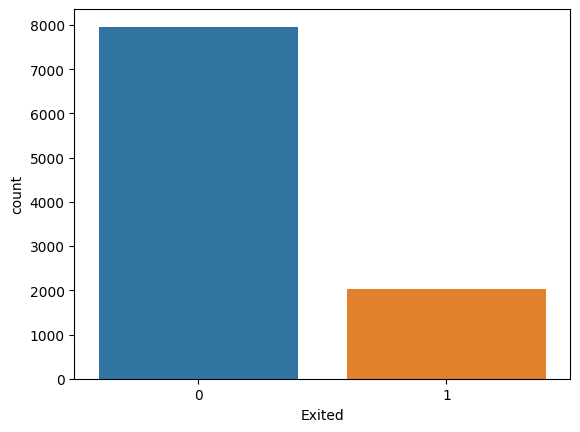

In [23]:
import seaborn as sns
sns.countplot(data=df,x='Exited')

# **Split data into X and y**

In [16]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [17]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0


# **Using SMOTE for imbalanced data**

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
X_sm,y_sm=SMOTE().fit_resample(X,y)

In [20]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# spliting data into training and test

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=.20,random_state=42)

# Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_train

array([[ 0.22033589,  0.20722358,  1.54318041, ..., -0.57263713,
        -0.46137976,  1.1842355 ],
       [ 1.09261769,  0.10692236, -1.40640884, ..., -0.57263713,
        -0.46137976,  1.1842355 ],
       [-0.07405922,  0.50812723,  1.17448176, ..., -0.57263713,
        -0.46137976, -0.84442663],
       ...,
       [ 0.19852884,  0.20722358,  1.17448176, ..., -0.57263713,
        -0.46137976,  1.1842355 ],
       [-1.2189291 ,  0.20722358, -1.40640884, ..., -0.57263713,
        -0.46137976, -0.84442663],
       [ 0.52563452,  1.00963333, -1.40640884, ...,  1.74630661,
        -0.46137976,  1.1842355 ]])

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log=LogisticRegression()

In [26]:
log.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred1=log.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred1)

0.7868801004394225

In [31]:
from sklearn.metrics import precision_score,recall_score,f1_score


In [32]:
precision_score(y_test,y_pred1)


0.7717661691542289

In [33]:
recall_score(y_test,y_pred1)


0.7990985189954926

In [34]:
f1_score(y_test,y_pred1)


0.7851945586839607

# **SVM**

In [36]:
from sklearn import svm

In [37]:
svm=svm.SVC()

In [38]:
svm.fit(X_train,y_train)

SVC()

In [42]:
y_pred2=svm.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.8389830508474576

In [44]:
precision_score(y_test,y_pred2)


0.825

# KNeighbours classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
k=KNeighborsClassifier()

In [47]:
k.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred3=k.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred3)


0.8188951663527935

In [50]:
precision_score(y_test,y_pred3)


0.797924297924298

# Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier


In [52]:
dt = DecisionTreeClassifier()


In [53]:
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [54]:
y_pred4 = dt.predict(X_test)


In [55]:
accuracy_score(y_test,y_pred4)


0.8010043942247332

In [56]:
precision_score(y_test,y_pred4)


0.7852265673494724

# Random forest classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier


In [58]:
rf = RandomForestClassifier()


In [59]:
rf.fit(X_train,y_train)


RandomForestClassifier()

In [60]:
y_pred5 = rf.predict(X_test)


In [61]:
accuracy_score(y_test,y_pred5)


0.8581293157564344

In [62]:
precision_score(y_test,y_pred5)


0.8481973434535104

# Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier


In [64]:
gbc = GradientBoostingClassifier()


In [65]:
gbc.fit(X_train,y_train)


GradientBoostingClassifier()

In [66]:
y_pred6 = gbc.predict(X_test)


In [67]:
accuracy_score(y_test,y_pred6)


0.8427495291902072

In [68]:
precision_score(y_test,y_pred6)


0.8316519546027743

In [71]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [72]:
final_data

,Models,ACC
0,LR,0.786880
1,SVC,0.838983
2,KNN,0.818895
3,DT,0.801004
4,RF,0.858129
5,GBC,0.842750


<Axes: xlabel='Models', ylabel='ACC'>

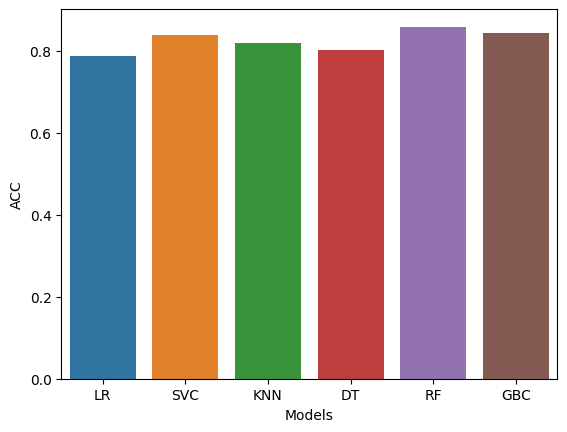

In [79]:
sns.barplot(data=final_data, x='Models',y='ACC')


In [80]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5),
                              precision_score(y_test,y_pred6)]})

In [81]:
final_data


,Models,PRE
0,LR,0.771766
1,SVC,0.825000
2,KNN,0.797924
3,DT,0.785227
4,RF,0.848197
5,GBC,0.831652


<Axes: xlabel='Models', ylabel='PRE'>

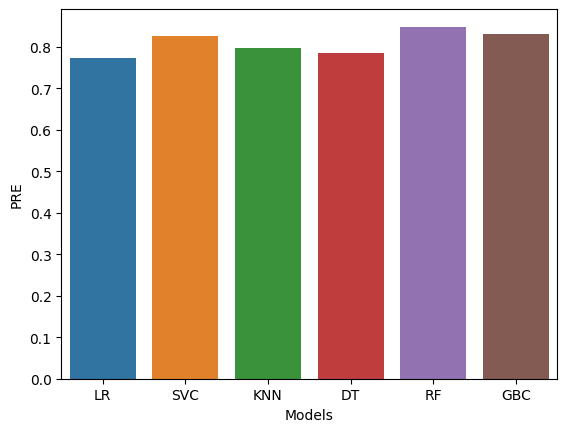

In [82]:
sns.barplot(data=final_data, x='Models',y='PRE')


# **Save the model**

In [83]:
X_sm=sc.fit_transform(X_sm)


In [85]:
rf.fit(X_sm,y_sm)


RandomForestClassifier()

In [86]:
import joblib


In [87]:
joblib.dump(rf,'churn_predict_model')


['churn_predict_model']

In [88]:
model = joblib.load('churn_predict_model')
